# Visualization of Train Stock Factors and Tweets

## Importing Cleaned Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
smf=pd.read_csv('smf_cleaned_train_val.csv')
json_df=pd.read_csv('json_df_cleaned_train_val.csv')

In [3]:
smf.head()

Id        date ticker       SF1       SF2       SF3       SF4       SF5  \
0   1  2018-08-21   NTAP -0.628652  0.988891 -0.055714  0.774379  0.551089   
1   2  2018-10-11   WYNN  1.315786  1.438754  0.187327  0.608933 -1.153030   
2   3  2018-08-21    DRI -1.141388 -1.455016  0.332755  0.674502  0.111326   
3   4  2018-07-10     GE -0.054839 -1.454149 -0.162267 -0.681870  0.307869   
4   5  2018-09-12     FE -0.686366  0.838865  0.073830  0.679024  0.329463   

        SF6       SF7  alpha  Month  Day  WeekDay  WeekNumber  
0 -1.329229 -0.995539      2      8   21        1          34  
1  1.859441  0.730995      3     10   11        3          41  
2 -0.478597 -1.488157      1      8   21        1          34  
3 -0.529987  0.404172      2      7   10        1          28  
4  1.262782 -1.024042      2      9   12        2          37

In [4]:
json_df.head()

Sentiment_score Stock      Date_T  Month  Day  WeekDay  WeekNumber  \
0                3   AMD  2018-09-19      9   19        2          38   
1                3   CAT  2018-10-09     10    9        1          41   
2                2  AVGO  2018-07-12      7   12        3          28   
3                2    PH  2018-07-19      7   19        3          29   
4                3    FB  2018-08-23      8   23        3          34   

                                       Tidy_Tweet  Punctuation_%  Text Length  
0            go hesit howev chart stabl go upward            1.6           62  
1          despit china trade war held well thumb            5.0           60  
2                                             wtf           22.2            9  
3  new insid file muller klau peter transact code           11.0          100  
4                bounc tommorrow right thing gtfo            2.2           45

## EDA 

### For SMF 

#### Kdeplot of Stock Factors for SMF

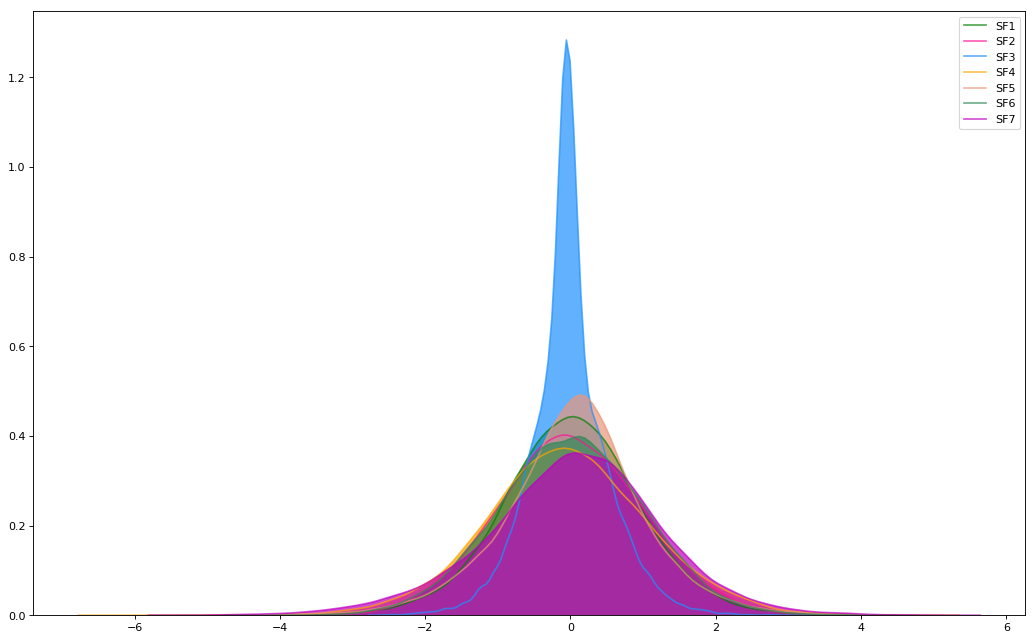

In [5]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(smf['SF1'], shade=True, color="g", label="SF1", alpha=.7)
sns.kdeplot(smf['SF2'], shade=True, color="deeppink", label="SF2", alpha=.7)
sns.kdeplot(smf['SF3'], shade=True, color="dodgerblue", label="SF3", alpha=.7)
sns.kdeplot(smf['SF4'], shade=True, color="orange", label="SF4", alpha=.7)
sns.kdeplot(smf['SF5'], shade=True, color="darksalmon", label="SF5", alpha=.7)
sns.kdeplot(smf['SF6'], shade=True, color="seagreen", label="SF6", alpha=.7)
sns.kdeplot(smf['SF7'], shade=True, color="m", label="SF7", alpha=.7);

@ Insights

All Stock Factors are normally distributed, SF3 has a different comparitively distribution to the other Stock Factors

####  Kdeplot of Alpha

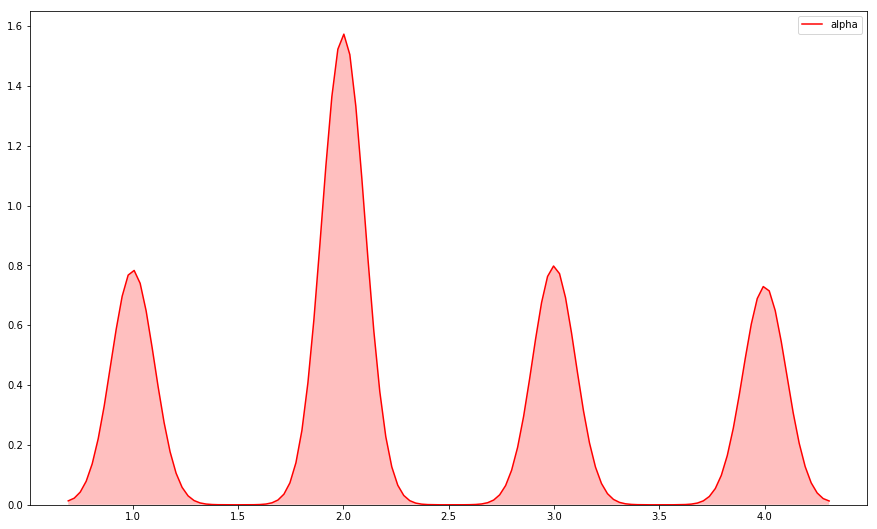

In [6]:
f, ax = plt.subplots(figsize=(15,20))

plt.subplot(2, 1, 2)
sns.kdeplot(smf['alpha'],shade=True, color="r");

@ Insights

Most of the Alpha Values in Stocks are 2

#### Countplot SMF

##### Day

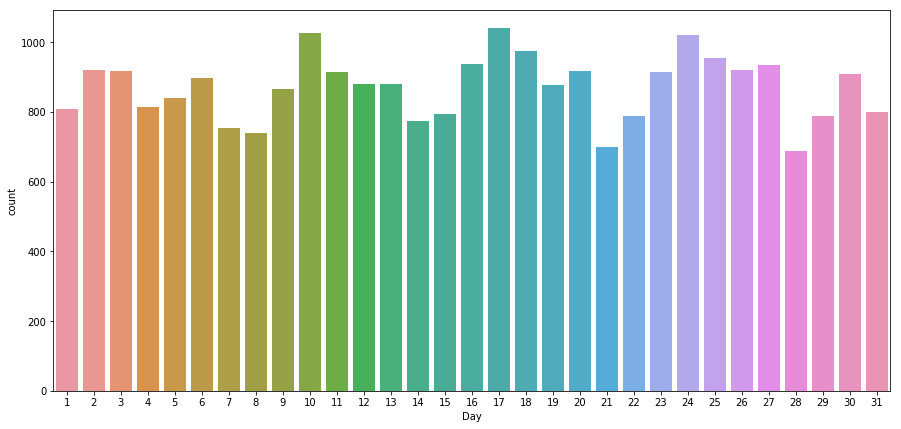

In [7]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('Day',data=smf);

@ Insights

Most of the Stocks occur at 10,17,24 Day of the Month

##### Month

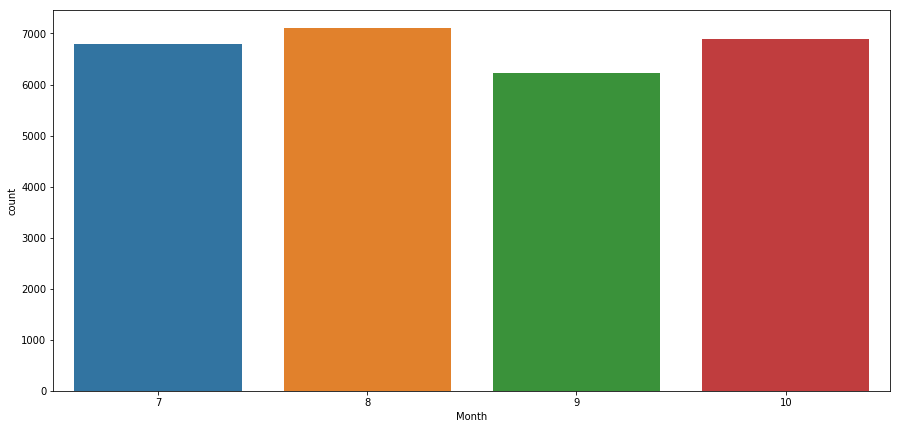

In [8]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('Month',data=smf);

@ Insights

1. Stocks we have been given range from July to October

2. Equal Counts of Stocks Monthly

##### WeekDay

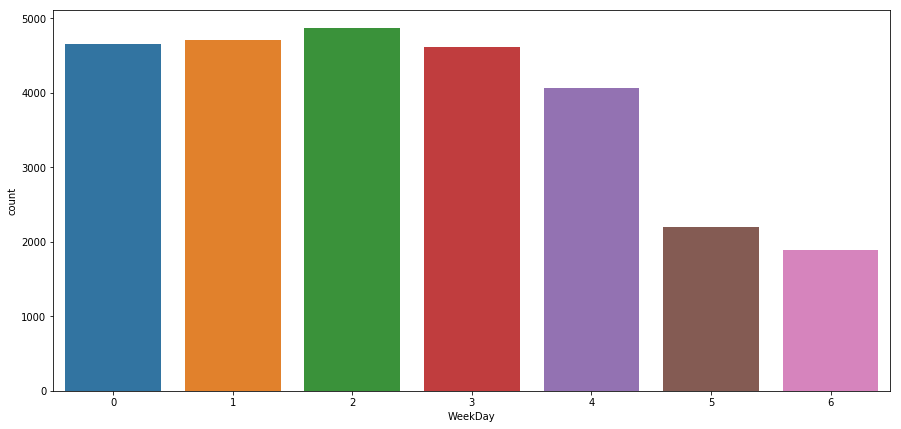

In [9]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('WeekDay',data=smf);

@ Insights

Most of the Stocks occur at Wednesday,Tuesday,Thursday,Friday in decreasing order

##### WeekNumber

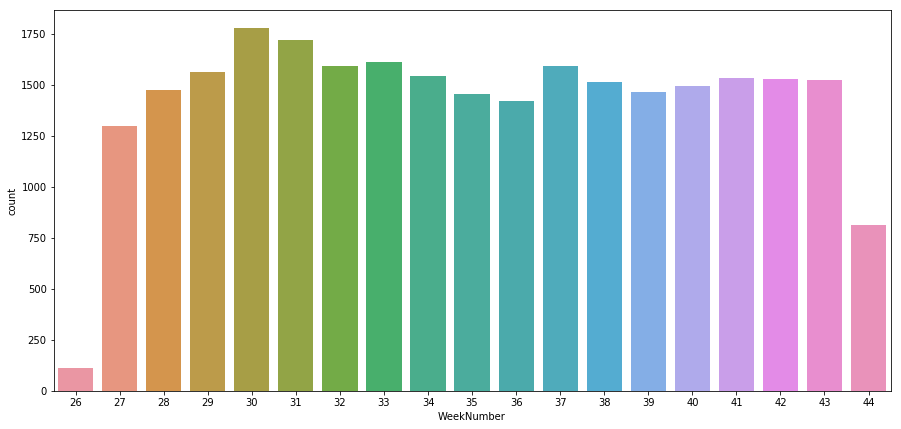

In [10]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('WeekNumber',data=smf);

@ Insights

July 22 to July 30 i.e Week 30 our Stocks Count occur the most 

##### Alpha

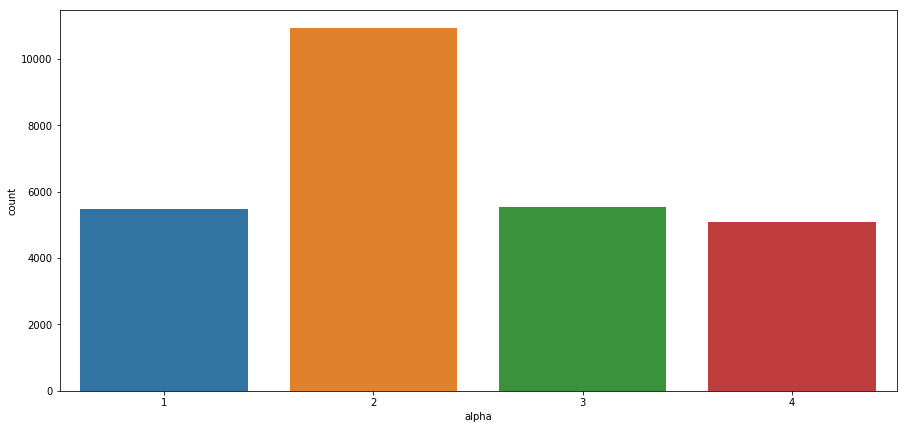

In [11]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('alpha',data=smf);

@ Insights

Most of the Stock Alpha Values are 2 i.e 43%

##### Ticker Counts

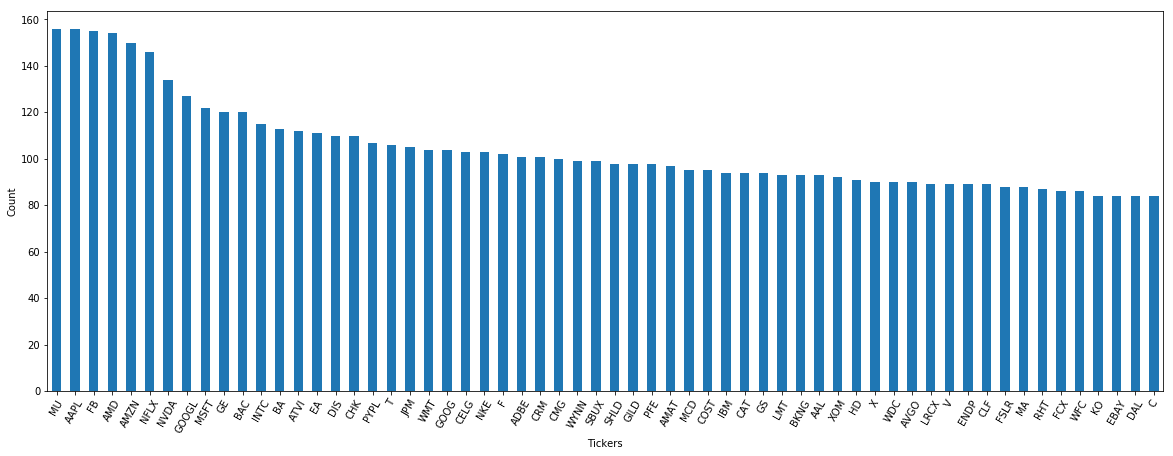

In [12]:
f,ax=plt.subplots(figsize=(20,7))

smf['ticker'].value_counts()[:60].plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Tickers')
plt.xticks(rotation=60);

@ Insights

Most of the Stock Tickers are Apple, Micron Technologies, Facebook, Advanced Micro Devices

#### Pairplot

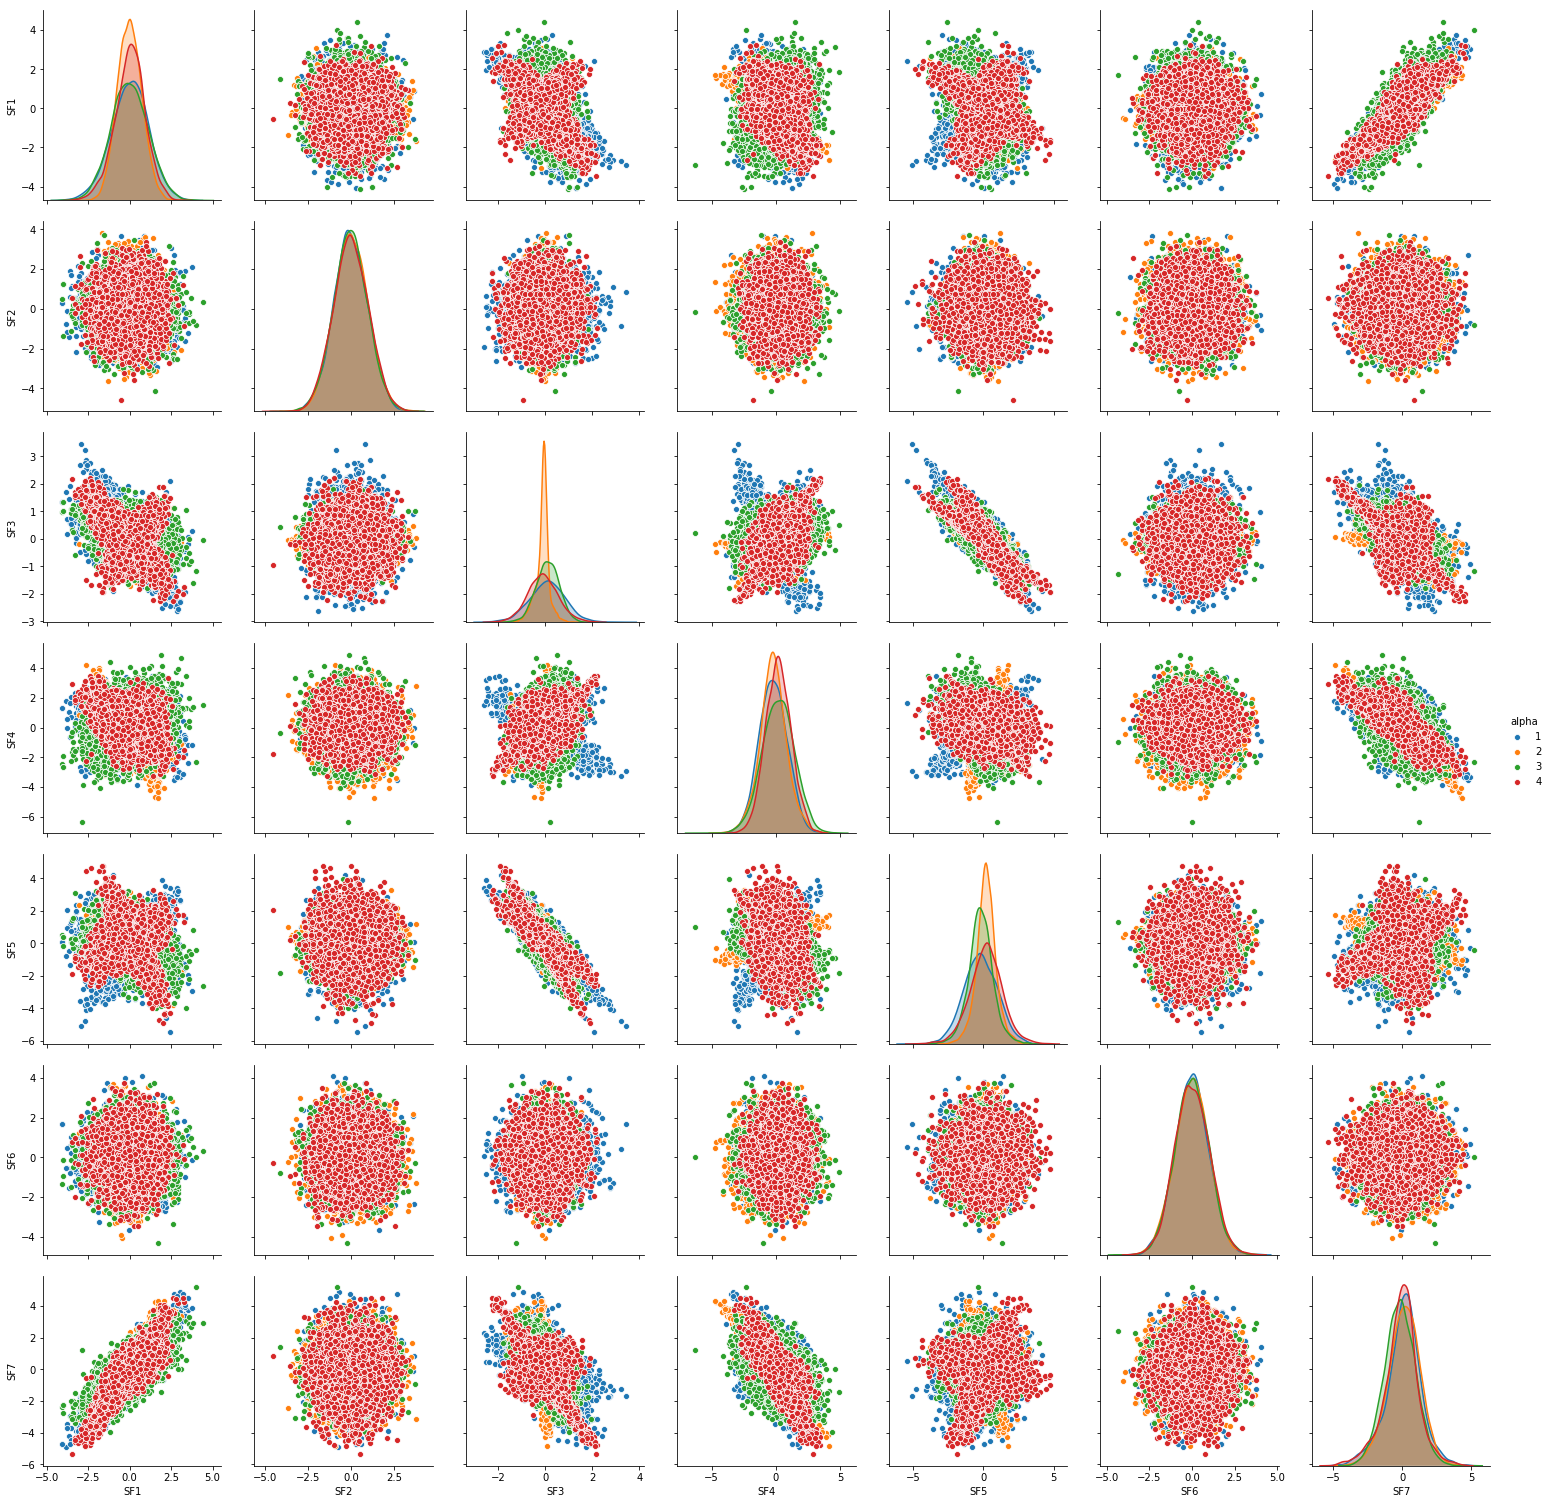

In [13]:
#OFF DIAG SCATTERPLOT and DIAG KDEPLOT on alpha
sns.pairplot(smf, size=3,vars=["SF1","SF2","SF3","SF4","SF5","SF6","SF7"],hue='alpha');

@ Insights

1. SF1 and SF7 positively correlated

2. SF7 and SF3 negatively correlated

3. SF3 and SF5 negatively correlated

#### PairGrid plot of Kde,Scatter,Reg

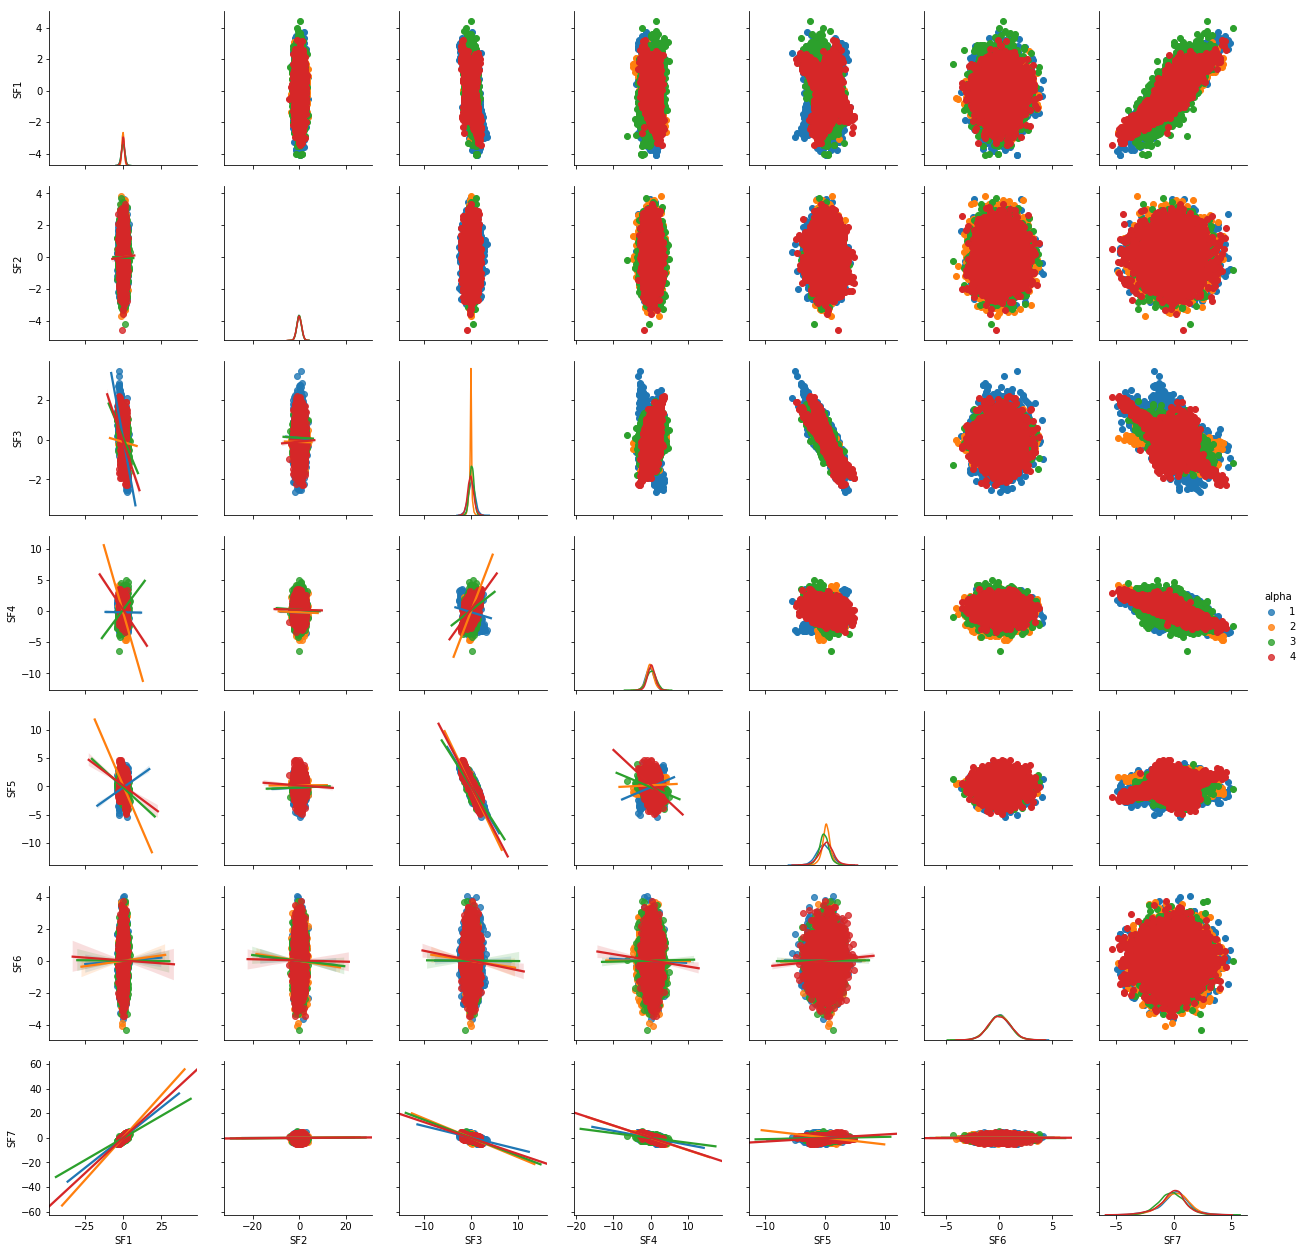

In [14]:
g = sns.PairGrid(smf,vars=["SF1", "SF2", "SF3", "SF4", "SF5", "SF6","SF7"],hue='alpha')
g.map_diag(sns.kdeplot) 
g.map_upper(plt.scatter) 
g.map_lower(sns.regplot)
g.add_legend();

@ Insights

Similar Findings from the Previous Plot

#### Corr Plot

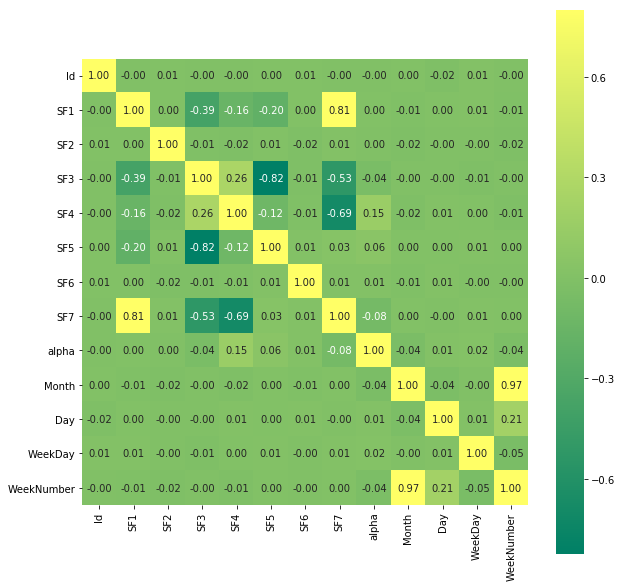

In [15]:
corrmat = smf.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer");#cmap ="winter"
plt.show()

@ Insights

Findings from Previous Two Plots can be matched

#### Point Plot 

##### Lmplots

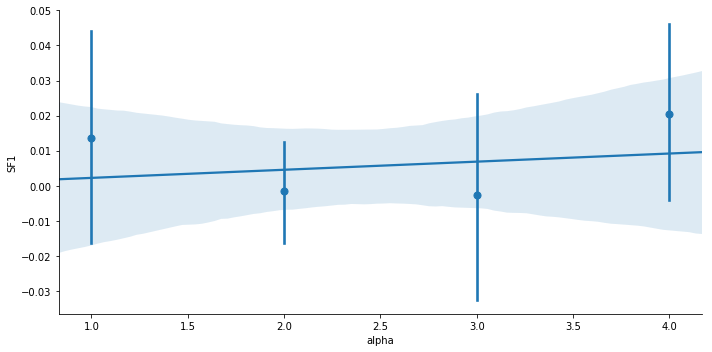

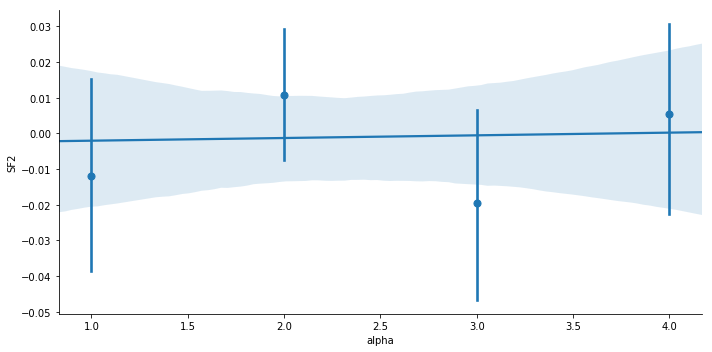

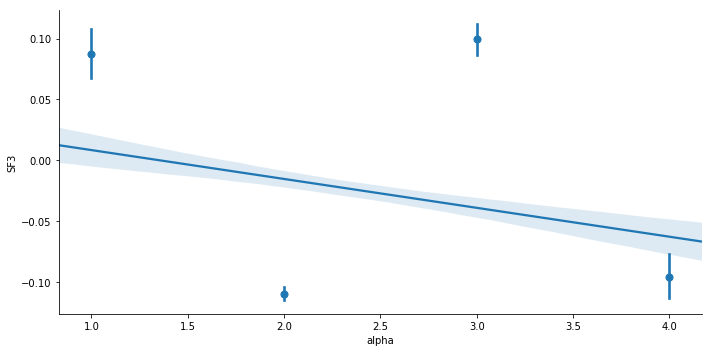

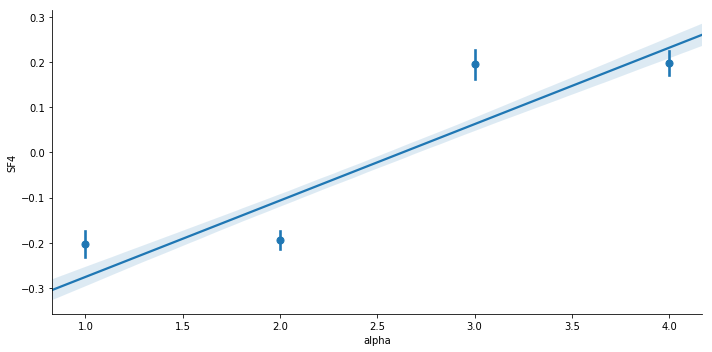

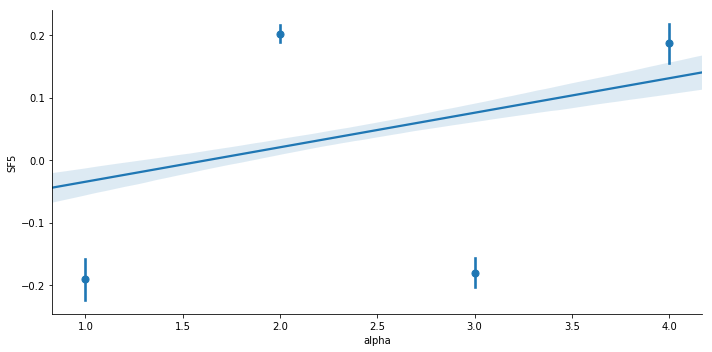

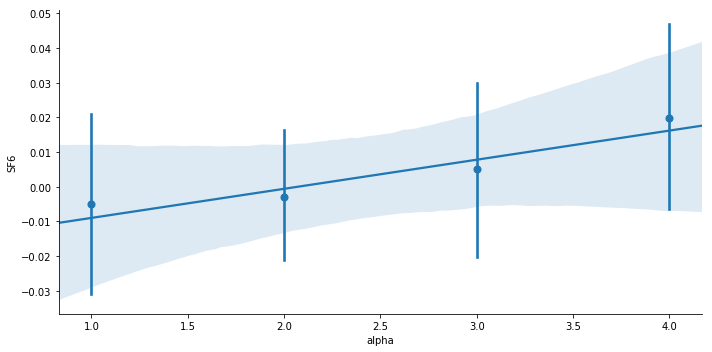

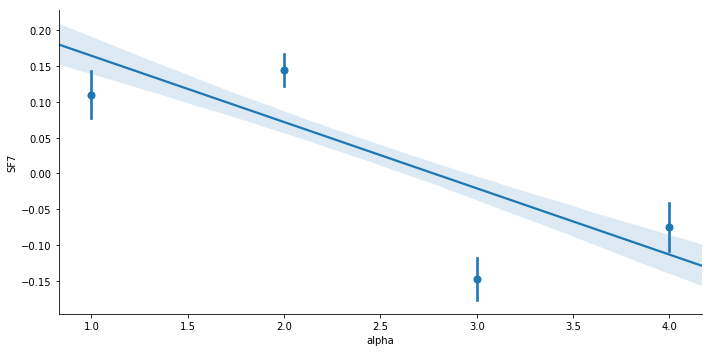

In [16]:
for i in ['SF1','SF2','SF3','SF4','SF5','SF6','SF7']:
    sns.lmplot(x='alpha',y=i, data=smf, x_estimator=np.mean,size=5, aspect=2);

@ Insights

SF1: All Alpha Values 0 correlated

SF2: All Alpha Values 0 correlated

SF3: All Alpha Values comparitvely negatively correlated

SF4: All Alpha Values comparitvely positively correlated

SF5: All Alpha Values comparitvely positively correlated

SF6: All Alpha Values comparitvely positively correlated

SF7: All Alpha Values comparitvely negatively correlated

### Factor Plot

#### Daywise Stockwise Factors (Alpha)

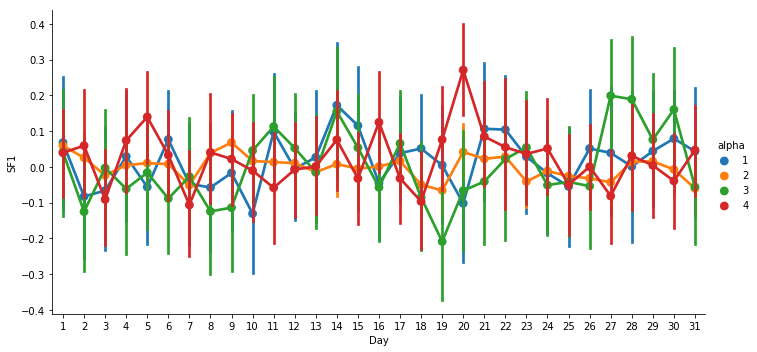

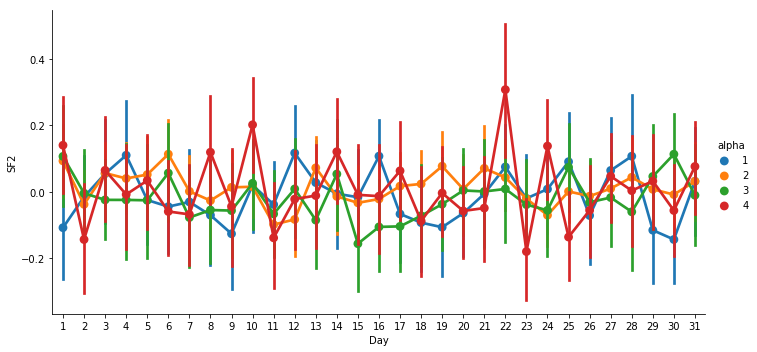

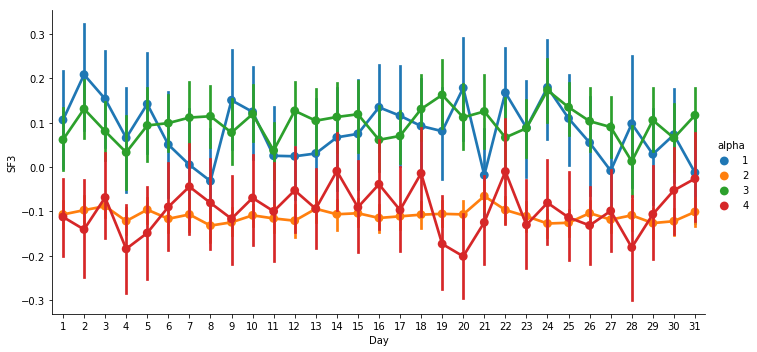

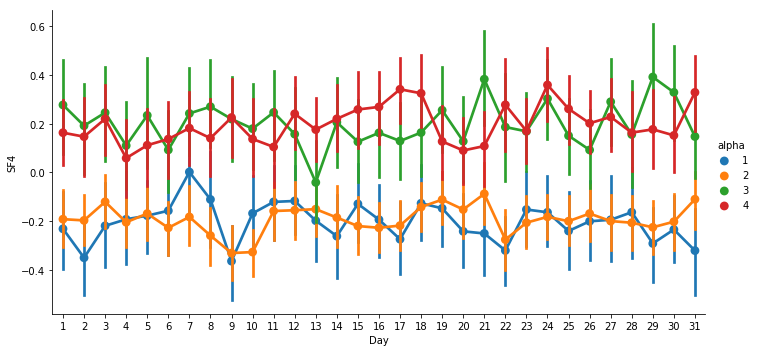

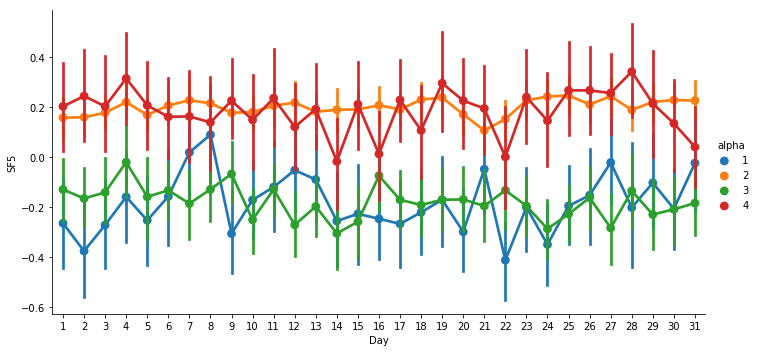

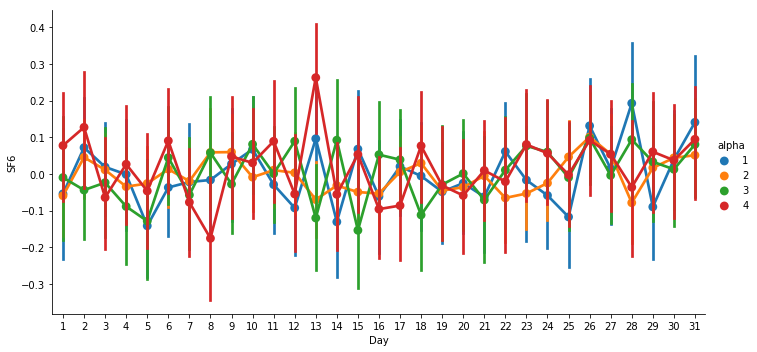

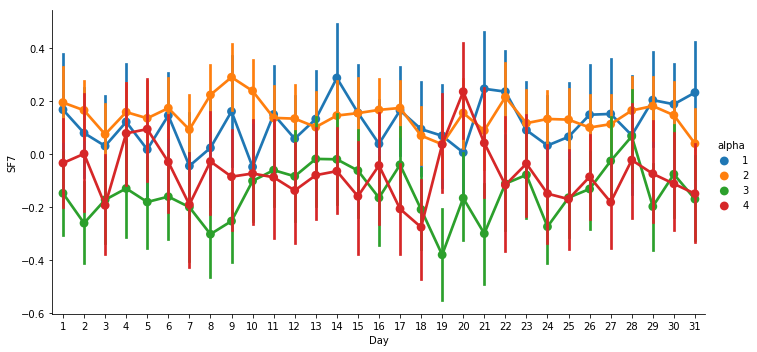

In [17]:
for i in ['SF1','SF2','SF3','SF4','SF5','SF6','SF7']:
    sns.factorplot(x='Day', y=i, data=smf, hue="alpha", size=5, aspect=2);

@ Insights

Findings Matched from Previous 

SF1: All Alpha Scores with respect to Days have values arbitrarily

SF2: All Alpha Scores with respect to Days have values arbitrarily

SF3: Alpha Scores 1,3 positive values
     Alpha Scores 2,4 negative values

SF4: Alpha Scores 3,4 positive values
     Alpha Scores 1,2 negative values

SF5: Alpha Scores 2,4 kindoff positive values
     Alpha Scores 1,3 kindoff negative values

SF6: All Alpha Scores with respect to Days have values arbitrarily

SF7: Alpha Scores 1,2 kindoff positive values
     Alpha Scores 3,4 kindoff negative values


#### Monthwise Stockwise Factors (Alpha)

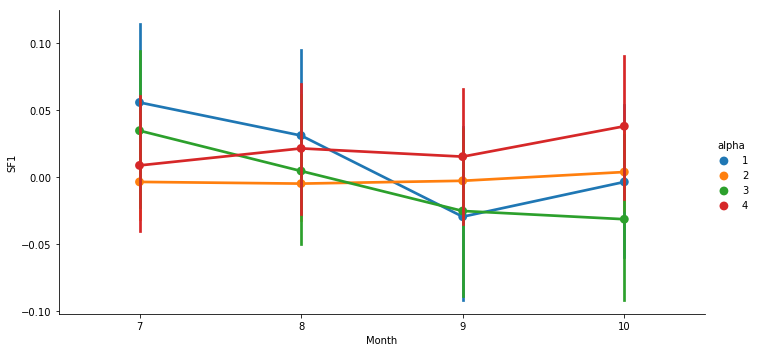

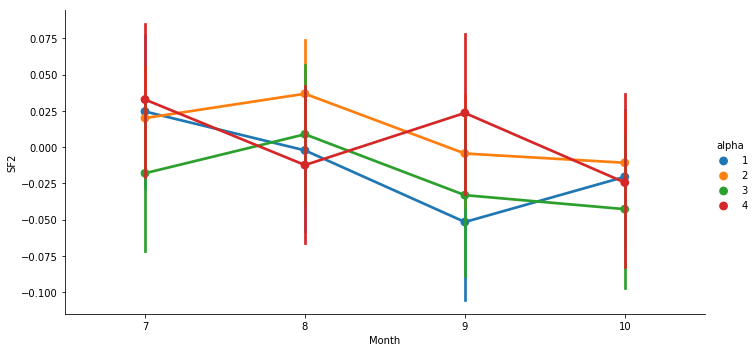

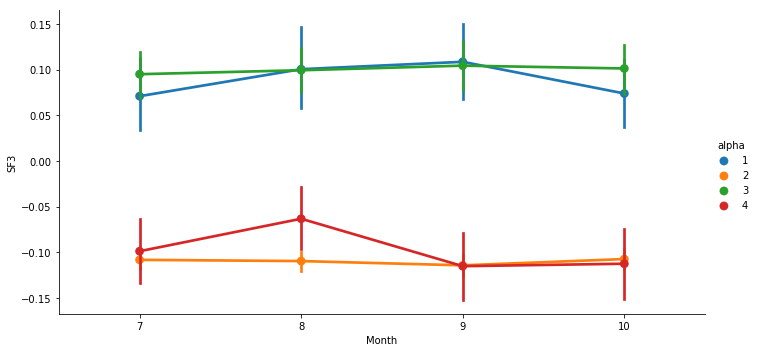

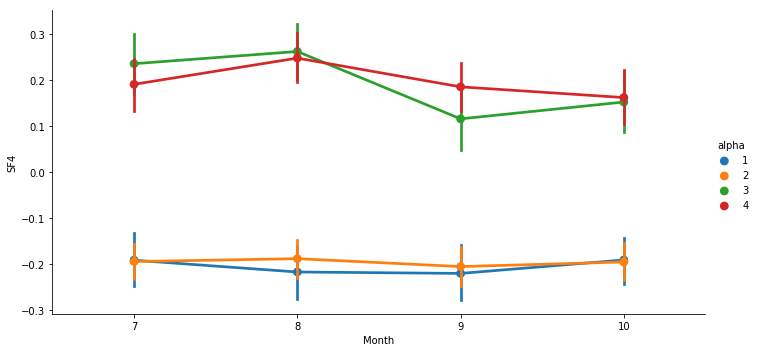

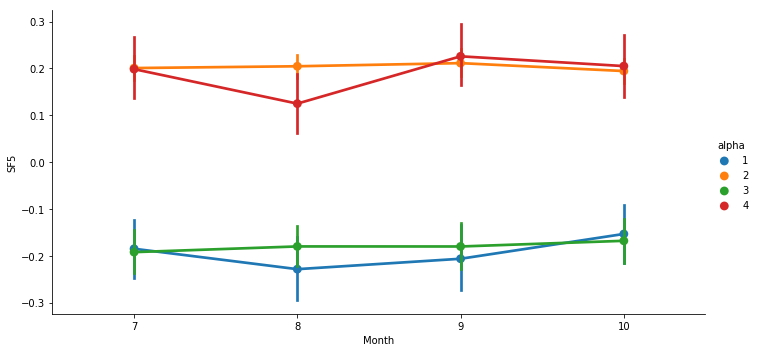

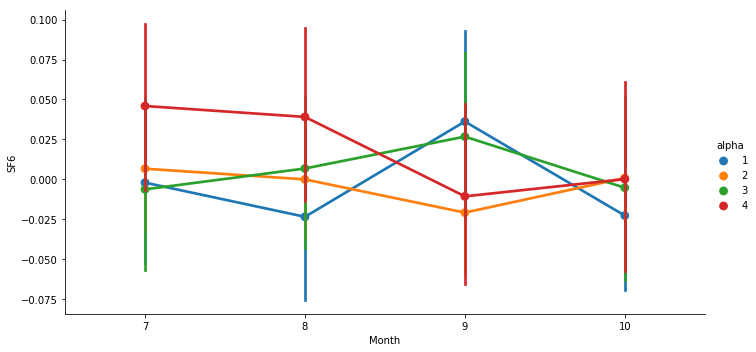

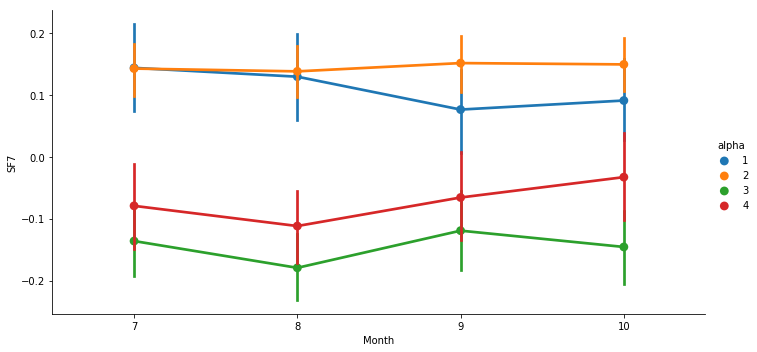

In [18]:
for i in ['SF1','SF2','SF3','SF4','SF5','SF6','SF7']:
    sns.factorplot(x='Month', y=i, data=smf, hue="alpha", size=5, aspect=2);

@ Insights

Findings Matched from Previous Daywise Plot

SF1: All Alpha Scores with respect to Month have values arbitrarily

SF2: All Alpha Scores with respect to Month have values arbitrarily

SF3: Alpha Scores 1,3 positive values
     Alpha Scores 2,4 negative values

SF4: Alpha Scores 3,4 positive values
     Alpha Scores 1,2 negative values

SF5: Alpha Scores 2,4 positive values
     Alpha Scores 1,3 negative values

SF6: All Alpha Scores with respect to Days have values arbitrarily

SF7: Alpha Scores 1,2 kindoff positive values
     Alpha Scores 3,4 kindoff negative values


#### WeekWise Stockwise Factors (Alpha)

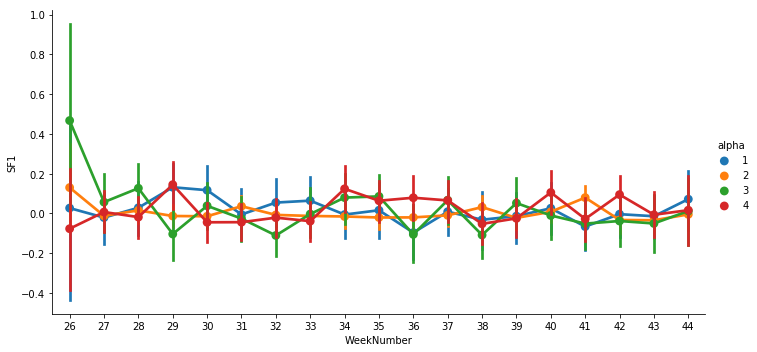

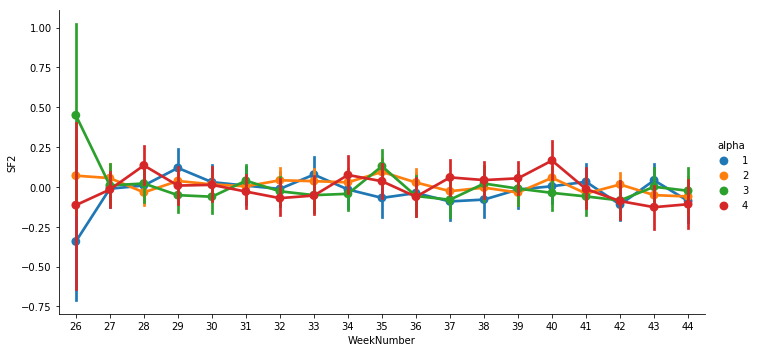

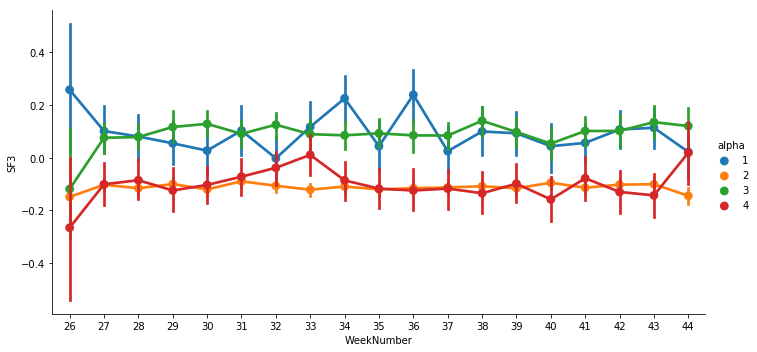

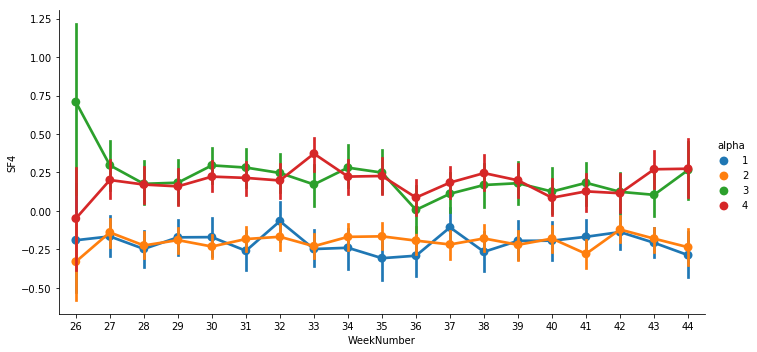

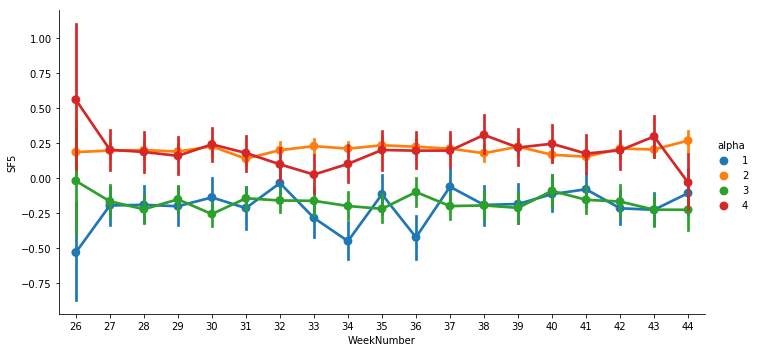

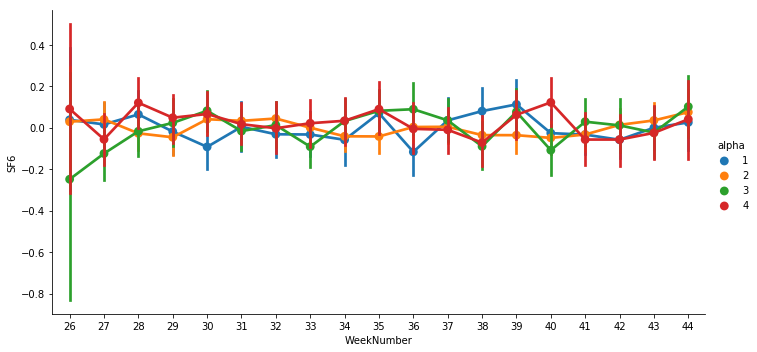

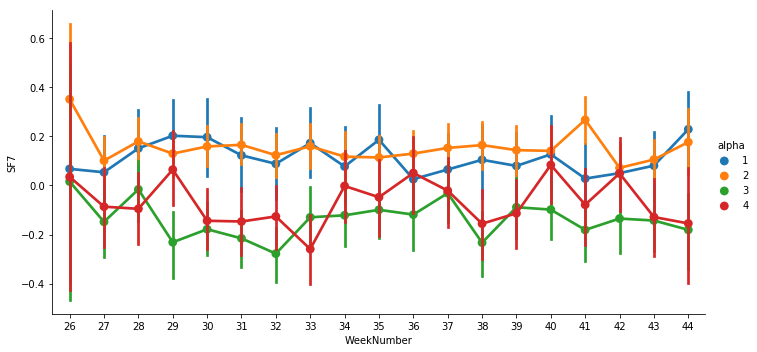

In [19]:
for i in ['SF1','SF2','SF3','SF4','SF5','SF6','SF7']:
    sns.factorplot(x='WeekNumber', y=i, data=smf, hue="alpha", size=5, aspect=2);

@ Insights

SF1: All Alpha Scores with respect to Weeks have values arbitrarily

SF2: All Alpha Scores with respect to Weeks have values arbitrarily

SF3: Alpha Scores 1,3 positive values
     Alpha Scores 2,4 negative values

SF4: Alpha Scores 3,4 positive values
     Alpha Scores 1,2 negative values

SF5: Alpha Scores 2,4 positive values
     Alpha Scores 1,3 negative values

SF6: All Alpha Scores with respect to Days have values arbitrarily

SF7: Alpha Scores 1,2 kindoff positive values
     Alpha Scores 3,4 kindoff negative values


### For JSON(Textual Data)

In [20]:
json_df.head()

Sentiment_score Stock      Date_T  Month  Day  WeekDay  WeekNumber  \
0                3   AMD  2018-09-19      9   19        2          38   
1                3   CAT  2018-10-09     10    9        1          41   
2                2  AVGO  2018-07-12      7   12        3          28   
3                2    PH  2018-07-19      7   19        3          29   
4                3    FB  2018-08-23      8   23        3          34   

                                       Tidy_Tweet  Punctuation_%  Text Length  
0            go hesit howev chart stabl go upward            1.6           62  
1          despit china trade war held well thumb            5.0           60  
2                                             wtf           22.2            9  
3  new insid file muller klau peter transact code           11.0          100  
4                bounc tommorrow right thing gtfo            2.2           45

#### Countplot

##### Sentiment_score

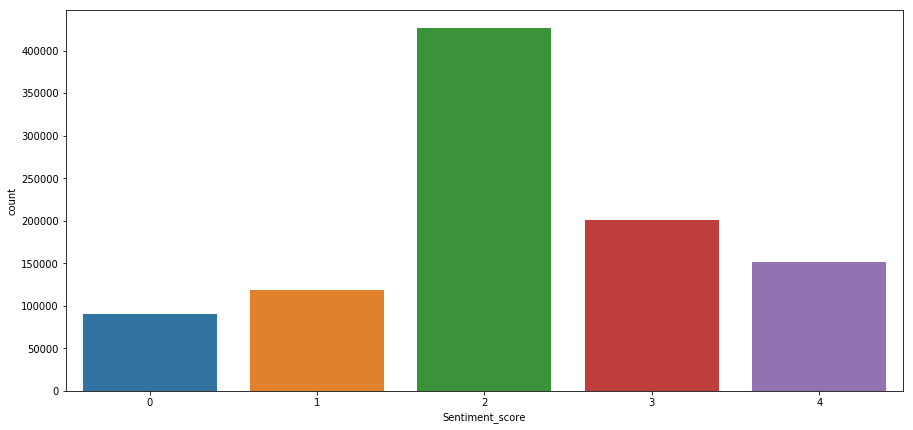

In [21]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('Sentiment_score',data=json_df);

@ Insights

Most of the Sentiment Scores have values 2 in the Tweet, which indicate more of Neutral Sentiment

##### Ticker Punctuation % Count

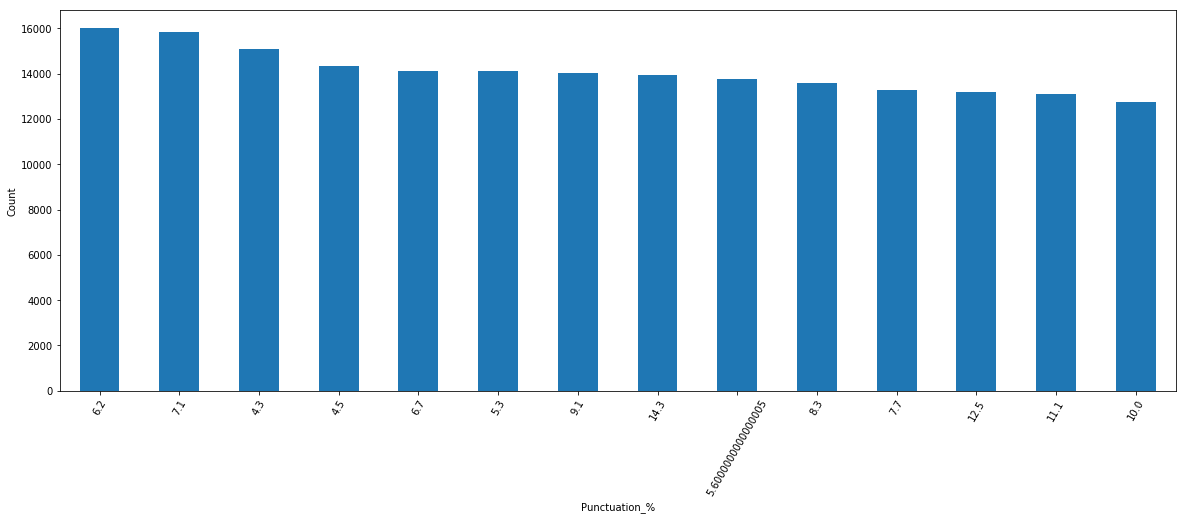

In [22]:
f,ax=plt.subplots(figsize=(20,7))

json_df['Punctuation_%'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Punctuation_%')
plt.ylabel('Count')
plt.xticks(rotation=60);

@ Insights

Most of the Tweets have less than 10% of the Punctuations before Cleaning

##### Text_Length Count

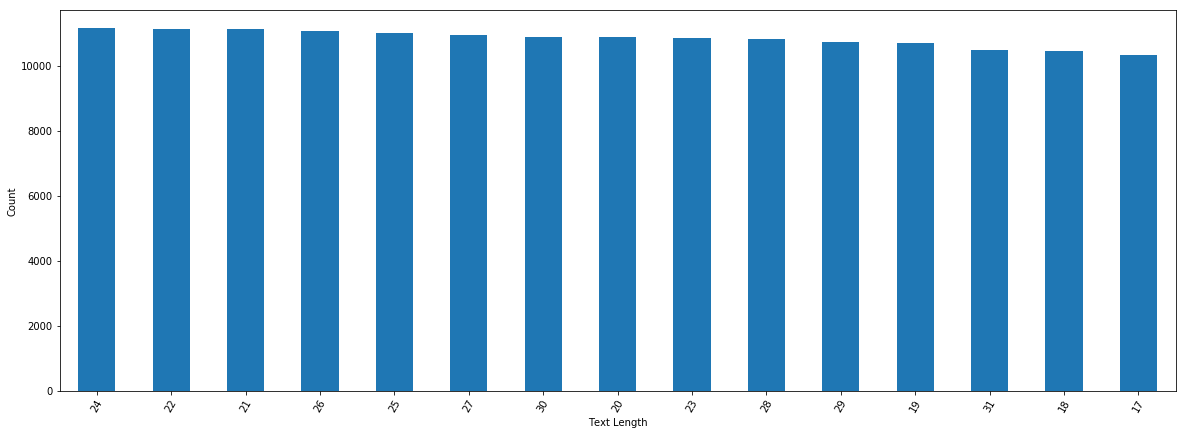

In [23]:
f,ax=plt.subplots(figsize=(20,7))

json_df['Text Length'].value_counts()[:15].plot(kind='bar')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.xticks(rotation=60);

@ Insights

Most of the Text Lengths of Tweets have Length between 20-30 before Cleaning

##### Tweet Counts by Companies

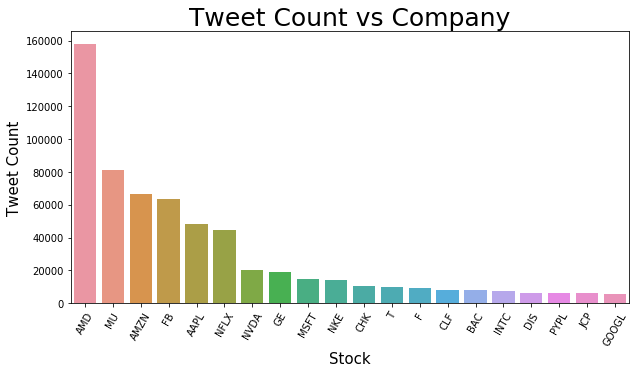

In [24]:
topctweets = json_df.groupby('Stock')[['Tidy_Tweet']].count()
topctweets=topctweets.reset_index()
topctweets=topctweets.sort_values('Tidy_Tweet',ascending=False)
topctweets.columns=["Stocks","Number of Tweets"]
plt.figure(figsize = (10,5))
sns.barplot(x='Stocks',y="Number of Tweets", data=topctweets.head(20))
plt.title('Tweet Count vs Company', size = 25) 
plt.xlabel('Stock',size = 15)
plt.ylabel('Tweet Count',size = 15)
plt.xticks(rotation=60);

@ Insights

Advanced Micro Devices, Micron Technologies, Amazon and Facebook have the highest Number of Tweets

#### General WordCloud 

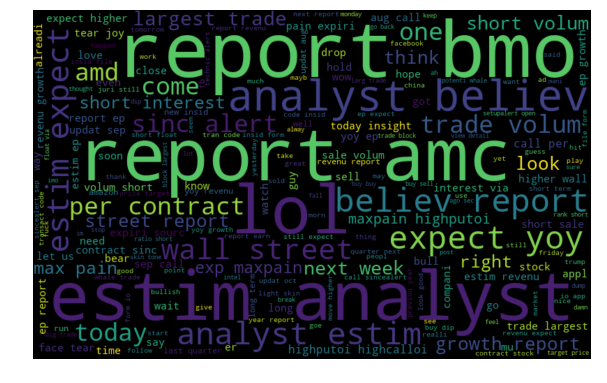

In [25]:
all_words = ' '.join([text for text in json_df['Tidy_Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

General WordClouds have more of reporting and analysis of Stocks Terms in the Overall Corpus

##### WordCloud for Sentiment Score 0

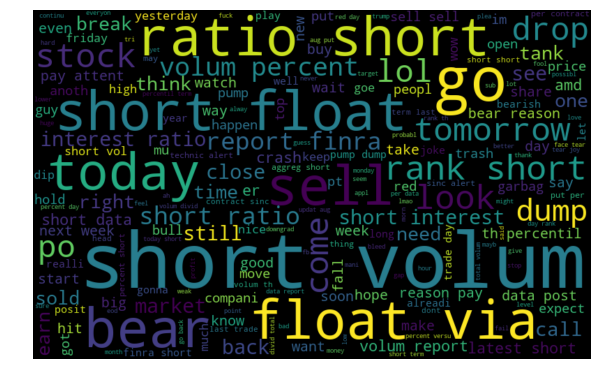

In [26]:
normal_words_0 =' '.join([text for text in json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_0)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

WordClouds with Sentiment Score 0 have words like bear,float,short and sell which correspond to negative Sentiments

##### WordCloud for Sentiment Score 1

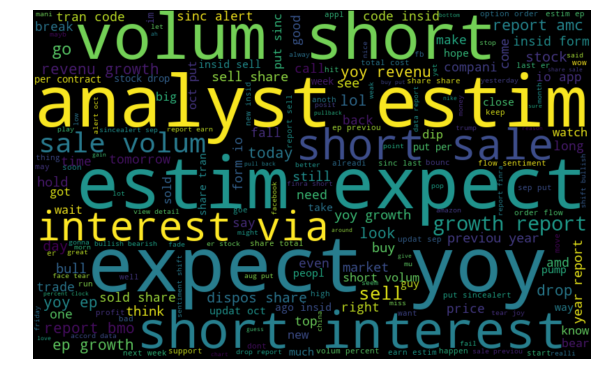

In [27]:
normal_words_1 =' '.join([text for text in json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_1)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

WordClouds with Sentiment Score 1 have words like volume,short,interest and sell which correspond to kindoff Negative Sentiments

##### WordCloud for Sentiment Score 2

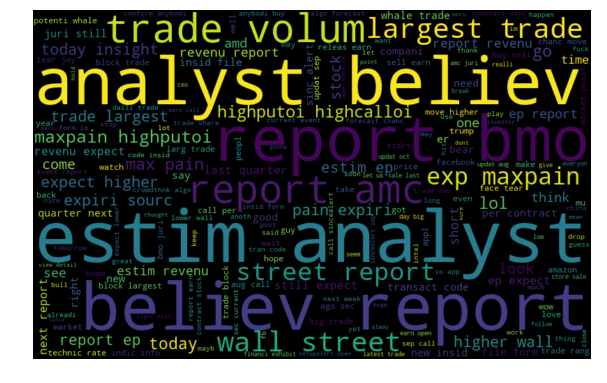

In [28]:
normal_words_2 =' '.join([text for text in json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 2]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_2)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

WordClouds with Sentiment Score 2 have words like analyst,estimize,believe and report which correspond to comparitvely less Negative Sentiments

##### WordCloud for Sentiment Score 3

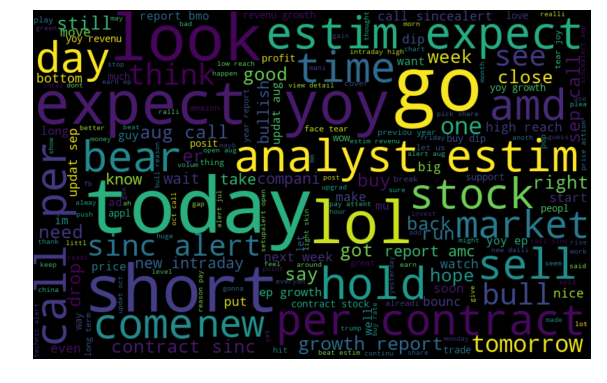

In [29]:
normal_words_3 =' '.join([text for text in json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 3]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_3)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

WordClouds with Sentiment Score 3 have words like today,market,expecting and stock which correspond to comparitvely Positive Sentiments

##### WordCloud for Sentiment Score 4

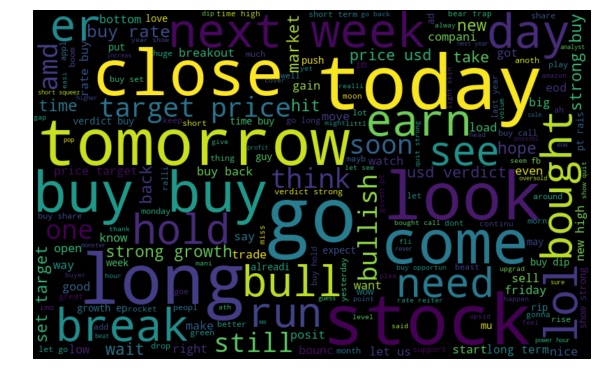

In [30]:
normal_words_4 =' '.join([text for text in json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words_4)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

WordClouds with Sentiment Score 4 have words like today,long,next,week,buy,buying and bought correspond to Positive Sentiments

##### Hashtag EDA

In [31]:
import re
import nltk
# Function to extract Text
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [32]:
HT_0 = hashtag_extract(json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 0])
HT_1 = hashtag_extract(json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 1])
HT_2 = hashtag_extract(json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 2])
HT_3 = hashtag_extract(json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 3])
HT_4 = hashtag_extract(json_df['Tidy_Tweet'][json_df['Sentiment_score'] == 4])


HT_0=sum(HT_0,[])
HT_1=sum(HT_1,[])
HT_2=sum(HT_2,[])
HT_3=sum(HT_3,[])
HT_4=sum(HT_4,[])

##### Hashtag Sentiment 0

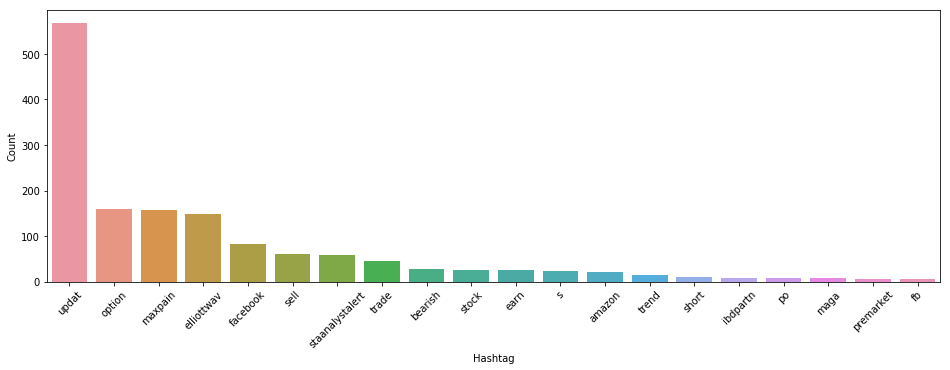

In [33]:
a = nltk.FreqDist(HT_0)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation = 45)
plt.show()

@ Insights

Hashtags with Sentiment Score 0 have maxpain,elliotwave which are Technical Analysis Terms in Stocks

@ Terms

1. update - General for getting Trends in Tweet

2. maxpain - Strike price with the most open contract puts and calls - and the price at which the stock would cause financial losses for the largest number of option holders at expiration

3. elliotwave - Elliott Wave Principle posits that collective investor psychology, or crowd psychology, moves between optimism and pessimism in natural sequences

4. staanalystalert - Some Alert Mechanism for Tweets

5. earnings - Earnings are the amount of profit that a company produces during a specific period, which is usually defined as a quarter (three calendar months) or a year

6. bearish - The price of stocks will decline in value

7. ibdpartner - Investors Business Daily Alert 

8. maga - Probably Make America Great Again

9. premarket -  Pre-market stock trading occurs before the stock market opens up for its regular hours of trading at 9:30 a.m ET. Pre-market stock trading takes place between the hours of 8:00 to 9:30 a.m. ET.

##### Hashtag Sentiment 1

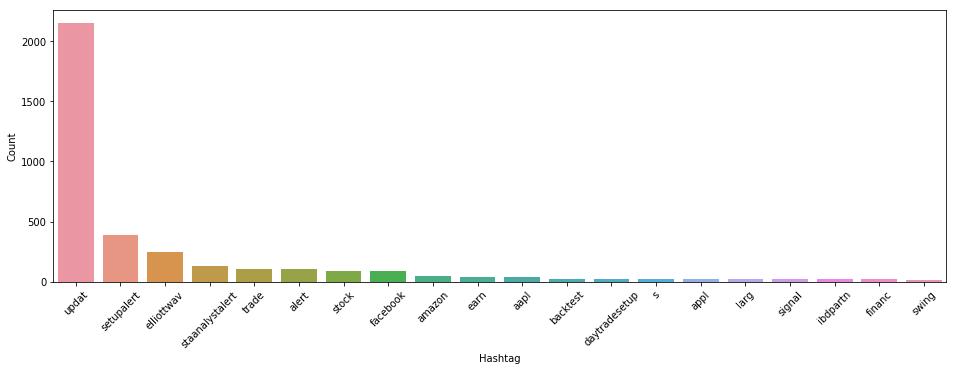

In [34]:
a = nltk.FreqDist(HT_1)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation = 45)
plt.show()

@ Insights

Hashtags with Sentiment Score 1 have update,setupalert and appl which have kindoff Neutral Sentiment

@ Terms

1. backtested - Backtesting allows a trader to simulate a trading strategy using historical data to generate results and analyze risk and profitability before risking any actual capital

2. swing - Swing trading is a style of trading that attempts to capture gains in a stock (or any financial instrument) over a period of a few days to several weeks

##### Hashtag Sentiment 2

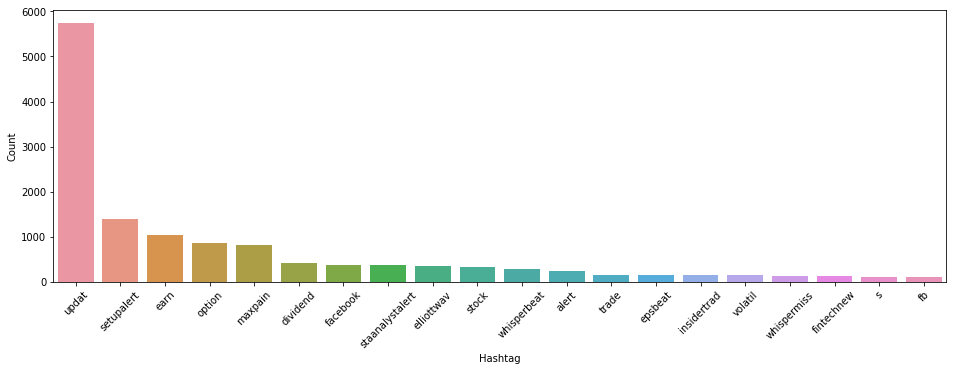

In [35]:
a = nltk.FreqDist(HT_2)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation = 45)
plt.show()

@ Insights

Hashtags with Sentiment Score 2 have update,setupalert and earnings which have Neutral Sentiment in Stocks

@ Terms

1. whisperbeat - EarningsNews and FXAce Stock Alerts

2. dividends - Dividends are basically the part of profit or "cash in hand" which a company shares with its shareholders.

3. epsbeat - epsguid Alerts

4. insidertrading - Insider trading is the buying or selling of a publicly traded company's stock by someone who has non-public, material information about that stock

5. volatility - Volatility is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns

6. whispermiss - epsguid Alerts

7. fintechnews - FinTech Tweet Alerts

##### Hashtag Sentiment 3

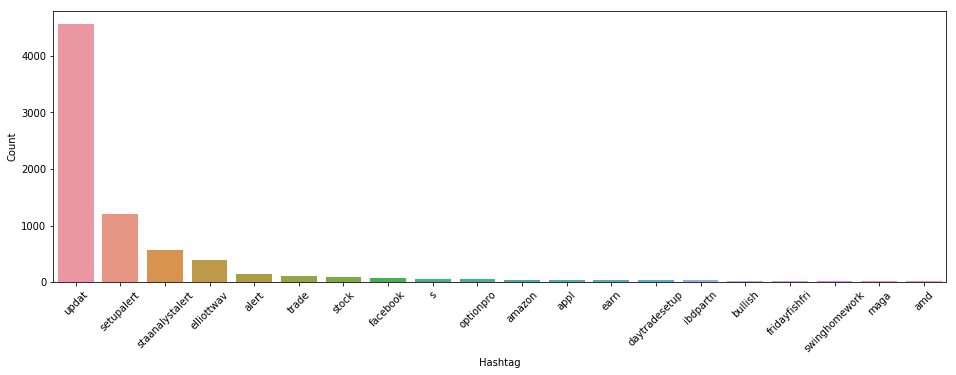

In [36]:
a = nltk.FreqDist(HT_3)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation = 45)
plt.show()

@ Insights

Hashtags with Sentiment Score 3 have words like today,long,next,week,buy,buying and bought correspond to comparitvely Positive Sentiments

@ Terms

1. optionpros - Stocks Alerts

2. daytradesetup - Day trading setup is simply an entry strategy for getting into a stock

##### Hashtag Sentiment 4

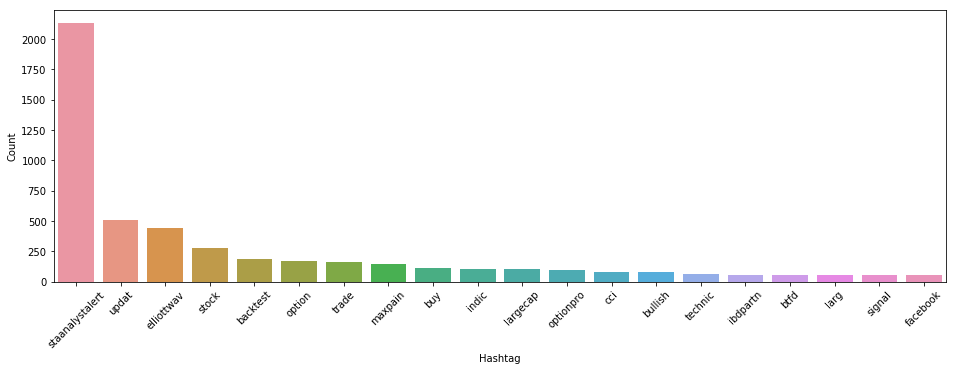

In [37]:
a = nltk.FreqDist(HT_4)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.xticks(rotation = 45)
plt.show()

@ Insights

Hashtags with Sentiment Score 4 have words like bullish,buy,large which indicate positive sentiments towards Stocks

@ Terms

1. indicators - Indicators are additions or overlays on the chart that provide extra information through mathematical calculations on price and volume

2. largecap - Large-cap stocks are shares of a company with a market capitalization of more than $5 billion

3. oci - Overseas Citizen of India

4. btfd - BTFD means “buy the f'n dip” and refers to the idea of buying a stock or commodity during a price decline

## Cleaning Hashtags Overall

In [38]:
json_df['Tidy_Tweet'] = json_df['Tidy_Tweet'].str.replace("#+", "")
json_df.head()

Sentiment_score Stock      Date_T  Month  Day  WeekDay  WeekNumber  \
0                3   AMD  2018-09-19      9   19        2          38   
1                3   CAT  2018-10-09     10    9        1          41   
2                2  AVGO  2018-07-12      7   12        3          28   
3                2    PH  2018-07-19      7   19        3          29   
4                3    FB  2018-08-23      8   23        3          34   

                                       Tidy_Tweet  Punctuation_%  Text Length  
0            go hesit howev chart stabl go upward            1.6           62  
1          despit china trade war held well thumb            5.0           60  
2                                             wtf           22.2            9  
3  new insid file muller klau peter transact code           11.0          100  
4                bounc tommorrow right thing gtfo            2.2           45

## Saving Cleaned JSON(Textual Data)

In [39]:
json_df.shape

(986803, 10)

In [40]:
json_df.to_csv('json_df_cleaned_train_val_1.csv',index=False)

## Fin

# Visualization of Test Stock Factors and Tweets

## Importing Cleaned Data

In [2]:
smf=pd.read_csv('smf_cleaned_test.csv')
json_df=pd.read_csv('json_df_cleaned_test.csv')

In [3]:
smf.head()

Id        date ticker       SF1       SF2       SF3       SF4  \
0  270007  2018-07-21   INTC -3.062194  1.223466  1.741714  2.279266   
1  270008  2018-10-05   CTSH  0.816263 -2.184408  0.157975 -0.264743   
2  270009  2018-10-01     CB  0.401281  0.091604  0.083411 -1.147041   
3  270010  2018-10-24   CTAS -0.783521  1.192929  0.813831 -0.368166   
4  270011  2018-07-27   INTC  0.796507  0.455341  0.679032  0.354336   

        SF5       SF6       SF7  Month  Day  WeekDay  WeekNumber  
0 -1.323573 -0.274912 -4.504449      7   21        5          29  
1 -0.836282  0.046276  0.826353     10    5        4          40  
2 -0.485223 -0.601060  1.012811     10    1        0          40  
3 -1.113656 -0.553581 -0.683803     10   24        2          43  
4 -1.799055  0.126153  0.297111      7   27        4          30

In [4]:
json_df.head()

Stock      Date_T  Month  Day  WeekDay  WeekNumber  \
0  CELG  2018-10-25     10   25        3          43   
1   AMD  2018-07-13      7   13        4          28   
2   AMD  2018-09-25      9   25        1          39   
3    MU  2018-07-31      7   31        1          31   
4  AMZN  2018-08-04      8    4        5          31   

                                          Tidy_Tweet  Punctuation_%  \
0                                          noth exit            3.7   
1          yall exhaust buyer first green candl byee            9.3   
2                                     day trader day           11.1   
3  weak price action far today dont afraid go sho...            3.4   
4  continu grow specif key area like cloud comput...            3.7   

   Text Length  
0           27  
1           54  
2           18  
3           88  
4          108

## EDA 

### For SMF 

#### Kdeplot of Stock Factors for SMF

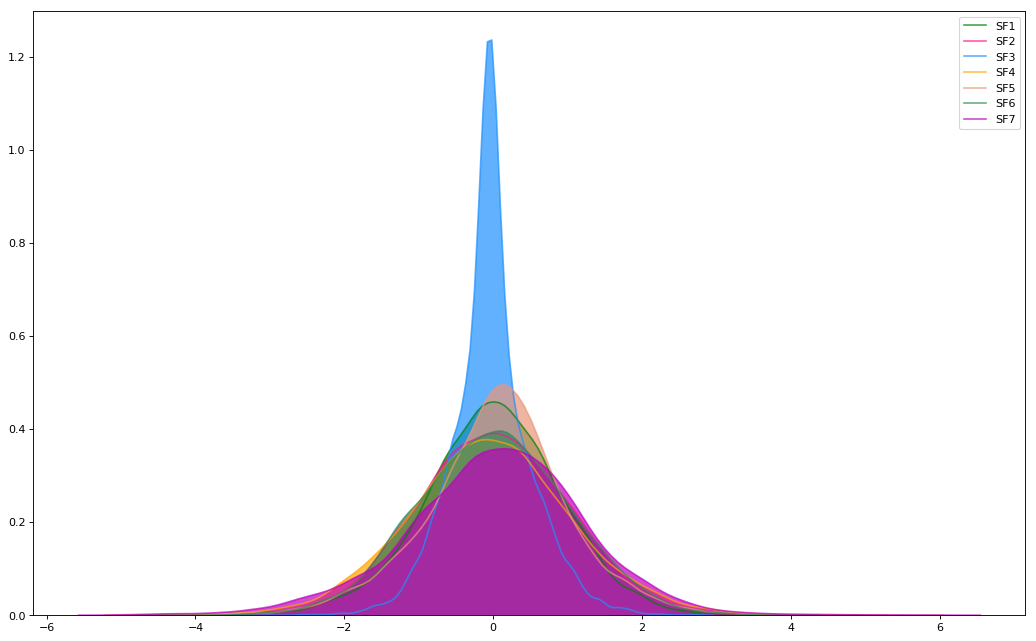

In [5]:
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(smf['SF1'], shade=True, color="g", label="SF1", alpha=.7)
sns.kdeplot(smf['SF2'], shade=True, color="deeppink", label="SF2", alpha=.7)
sns.kdeplot(smf['SF3'], shade=True, color="dodgerblue", label="SF3", alpha=.7)
sns.kdeplot(smf['SF4'], shade=True, color="orange", label="SF4", alpha=.7)
sns.kdeplot(smf['SF5'], shade=True, color="darksalmon", label="SF5", alpha=.7)
sns.kdeplot(smf['SF6'], shade=True, color="seagreen", label="SF6", alpha=.7)
sns.kdeplot(smf['SF7'], shade=True, color="m", label="SF7", alpha=.7);

@ Insights

All Stock Factors are normally distributed, SF3 has a different comparitively distribution to the other Stock Factors

####  Kdeplot of Alpha

In [6]:
# f, ax = plt.subplots(figsize=(15,20))

# plt.subplot(2, 1, 2)
# sns.kdeplot(smf['alpha'],shade=True, color="r");

#### Countplot SMF

##### Day

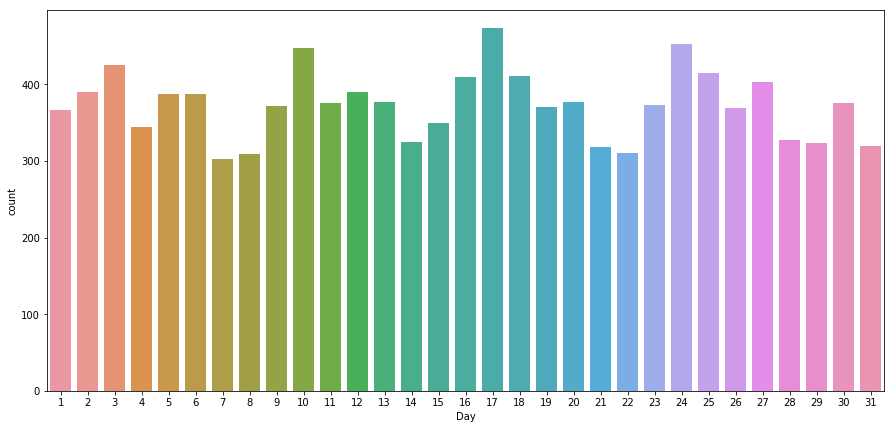

In [7]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('Day',data=smf);

@ Insights

Most of the Stocks occur at 10,17,24 Day of the Month

##### Month

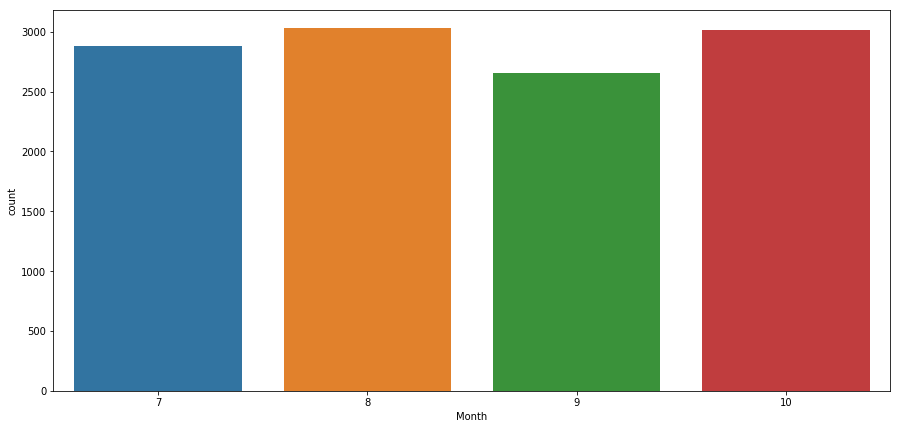

In [8]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('Month',data=smf);

@ Insights

1. Stocks we have been given range from July to October

2. Equal Counts of Stocks Monthly

##### WeekDay

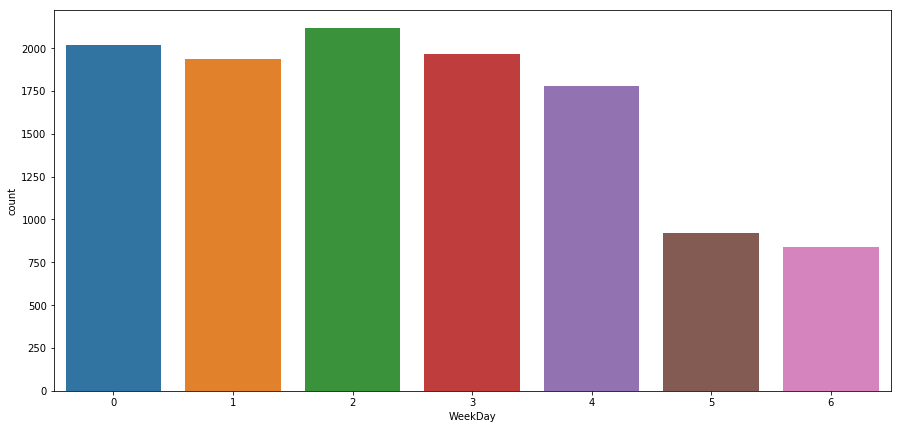

In [9]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('WeekDay',data=smf);

@ Insights

Most of the Stocks occur at Wednesday,Tuesday,Thursday,Friday in decreasing order

##### WeekNumber

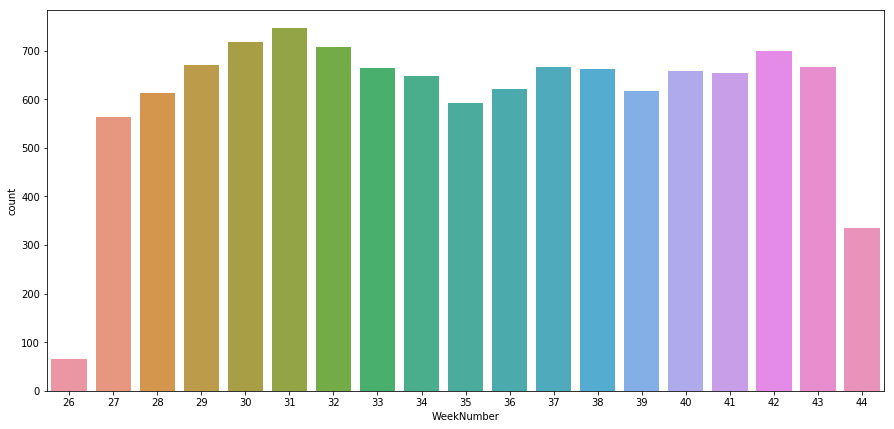

In [10]:
f, ax = plt.subplots(figsize=(15,7))
sns.countplot('WeekNumber',data=smf);

@ Insights

July 22 to July 30 i.e Week 30 our Stocks Count occur the most 

##### Ticker Counts

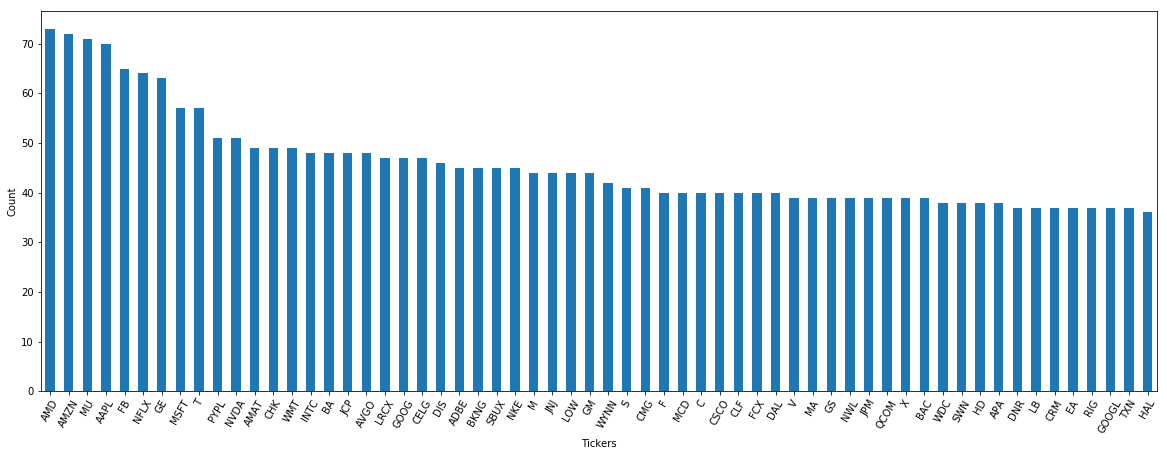

In [11]:
f,ax=plt.subplots(figsize=(20,7))

smf['ticker'].value_counts()[:60].plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Tickers')
plt.xticks(rotation=60);

@ Insights

Most of the Stock Tickers are Apple, Micron Technologies, Facebook, Advanced Micro Devices

@ Insights

Similar Findings from the Previous Plot

#### Corr Plot

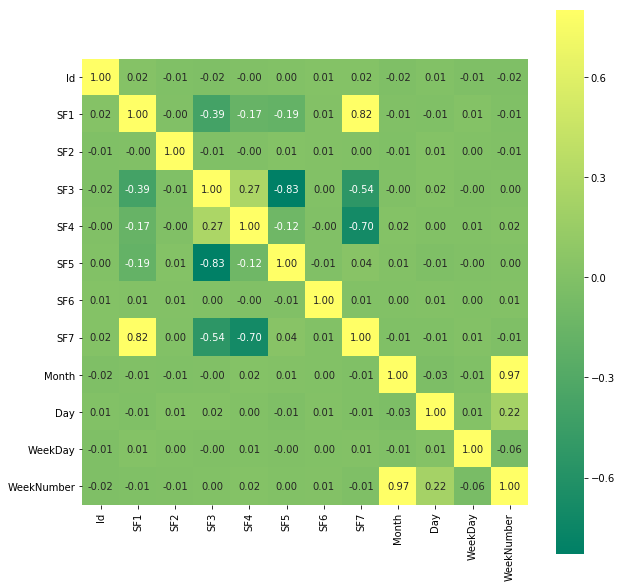

In [12]:
corrmat = smf.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer");#cmap ="winter"
plt.show()

@ Insights

Findings from Previous Two Plots can be matched

### For JSON(Textual Data)

In [13]:
json_df.head()

Stock      Date_T  Month  Day  WeekDay  WeekNumber  \
0  CELG  2018-10-25     10   25        3          43   
1   AMD  2018-07-13      7   13        4          28   
2   AMD  2018-09-25      9   25        1          39   
3    MU  2018-07-31      7   31        1          31   
4  AMZN  2018-08-04      8    4        5          31   

                                          Tidy_Tweet  Punctuation_%  \
0                                          noth exit            3.7   
1          yall exhaust buyer first green candl byee            9.3   
2                                     day trader day           11.1   
3  weak price action far today dont afraid go sho...            3.4   
4  continu grow specif key area like cloud comput...            3.7   

   Text Length  
0           27  
1           54  
2           18  
3           88  
4          108

#### Countplot

##### Ticker Punctuation % Count

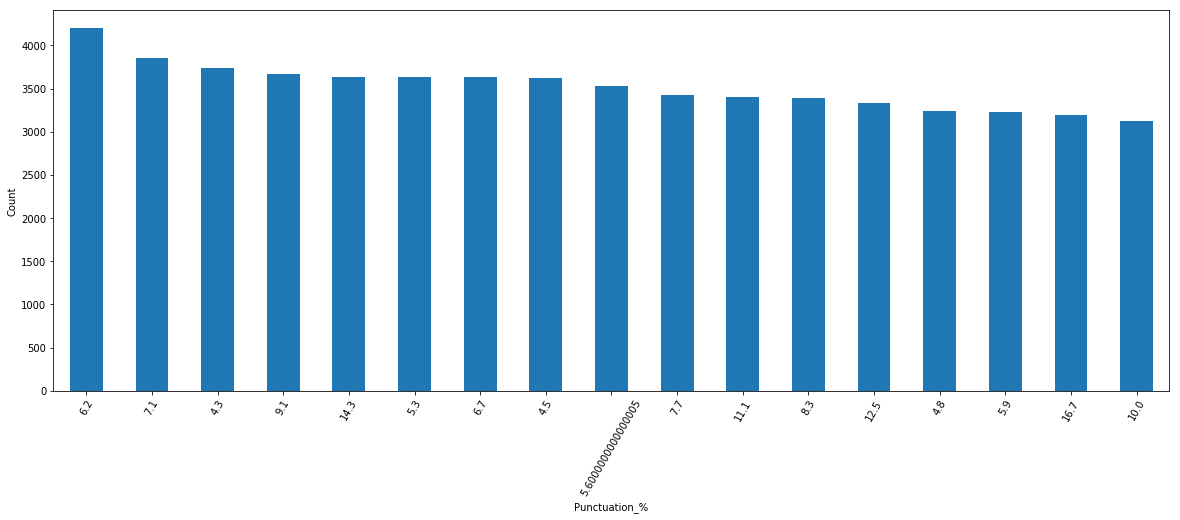

In [14]:
f,ax=plt.subplots(figsize=(20,7))

json_df['Punctuation_%'].value_counts()[:10].plot(kind='bar')
plt.xlabel('Punctuation_%')
plt.ylabel('Count')
plt.xticks(rotation=60);

@ Insights

Most of the Tweets have less than 10% of the Punctuations before Cleaning

##### Text_Length Count

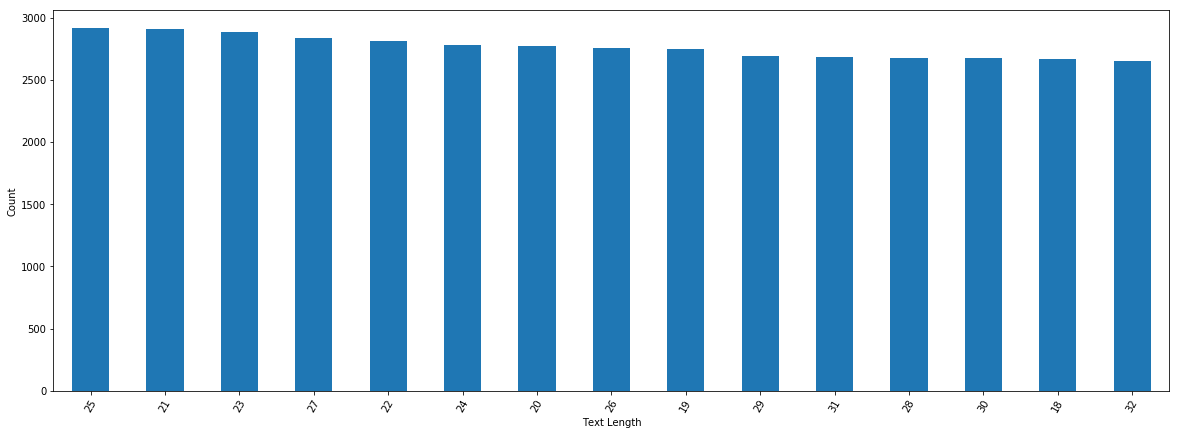

In [15]:
f,ax=plt.subplots(figsize=(20,7))

json_df['Text Length'].value_counts()[:15].plot(kind='bar')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.xticks(rotation=60);

@ Insights

Most of the Text Lengths of Tweets have Length between 20-30 before Cleaning

##### Tweet Counts by Companies

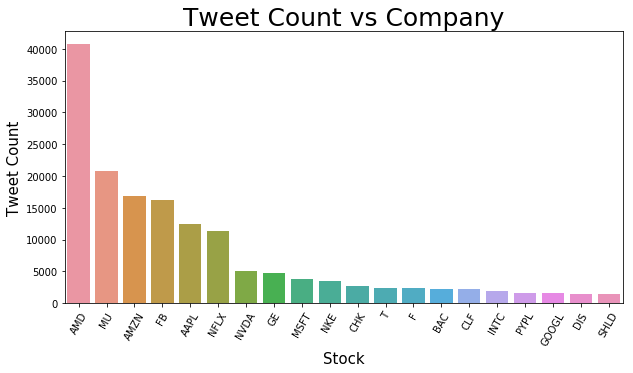

In [16]:
topctweets = json_df.groupby('Stock')[['Tidy_Tweet']].count()
topctweets=topctweets.reset_index()
topctweets=topctweets.sort_values('Tidy_Tweet',ascending=False)
topctweets.columns=["Stocks","Number of Tweets"]
plt.figure(figsize = (10,5))
sns.barplot(x='Stocks',y="Number of Tweets", data=topctweets.head(20))
plt.title('Tweet Count vs Company', size = 25) 
plt.xlabel('Stock',size = 15)
plt.ylabel('Tweet Count',size = 15)
plt.xticks(rotation=60);

@ Insights

Advanced Micro Devices, Micron Technologies, Amazon and Facebook have the highest Number of Tweets

#### General WordCloud 

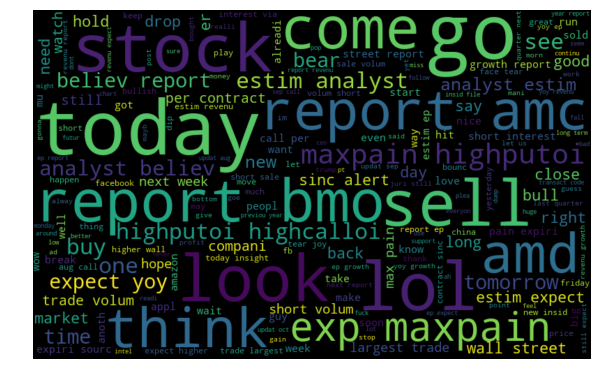

In [17]:
all_words = ' '.join([text for text in json_df['Tidy_Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

@ Insights

General WordClouds have more of reporting and analysis of Stocks Terms in the Overall Corpus

## Cleaning Hashtags Overall

In [18]:
json_df['Tidy_Tweet'] = json_df['Tidy_Tweet'].str.replace("#+", "")
json_df.head()

Stock      Date_T  Month  Day  WeekDay  WeekNumber  \
0  CELG  2018-10-25     10   25        3          43   
1   AMD  2018-07-13      7   13        4          28   
2   AMD  2018-09-25      9   25        1          39   
3    MU  2018-07-31      7   31        1          31   
4  AMZN  2018-08-04      8    4        5          31   

                                          Tidy_Tweet  Punctuation_%  \
0                                          noth exit            3.7   
1          yall exhaust buyer first green candl byee            9.3   
2                                     day trader day           11.1   
3  weak price action far today dont afraid go sho...            3.4   
4  continu grow specif key area like cloud comput...            3.7   

   Text Length  
0           27  
1           54  
2           18  
3           88  
4          108

## Saving Cleaned JSON(Textual Data)

In [19]:
json_df.shape

(254741, 9)

In [20]:
json_df.to_csv('json_df_cleaned_test_1.csv',index=False)

## Fin